In [34]:
#PROJECTimport numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('Melbourne_housing_FULL.csv')

In [4]:
df.head()

,Suburb,Address,Type,Price,Rooms,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,68 Studley St,h,NaN,2,SS,Jellis,3/09/2016,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958
1,Abbotsford,85 Turner St,h,1480000.0,2,S,Biggin,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,h,1035000.0,2,S,Biggin,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,u,NaN,3,VB,Rounds,4/02/2016,2.5,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116
4,Abbotsford,5 Charles St,h,1465000.0,3,SP,Biggin,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944


In [43]:
df.columns

Index(['Suburb', 'Address', 'Type', 'Price', 'Rooms', 'Method', 'SellerG',
       'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [5]:
#drop irrelevant columns
df.drop(['Suburb','Address','Type','Method','SellerG','Date',],axis=1,inplace=True)

df.columns

In [6]:

df.columns

Index(['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

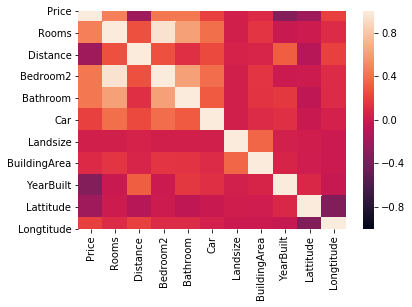

In [7]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)

In [ ]:
#change columns names

y='Price'
x1='Rooms'
x2='Distance'
x3='Bedroom2'
x4='Bathroom'
x5='Car'
x6='Landsize'
x7='BuildingArea'
x8='YearBuilt'
x9='Lattitude'
x10='Longtitude'

In [8]:
df.columns = ['y', 'x1-Rms', 'x2-Dist', 'x3-Bed', 
                'x4-Bath', 'x5-Car', 'x6-landsze', 'x7-BldArea','x8-yrBuilt','x9-latde','x10-Lonttde',] 
  

In [9]:
df.columns

Index(['y', 'x1-Rms', 'x2-Dist', 'x3-Bed', 'x4-Bath', 'x5-Car', 'x6-landsze',
       'x7-BldArea', 'x8-yrBuilt', 'x9-latde', 'x10-Lonttde'],
      dtype='object')

In [10]:
df.head()

,y,x1-Rms,x2-Dist,x3-Bed,x4-Bath,x5-Car,x6-landsze,x7-BldArea,x8-yrBuilt,x9-latde,x10-Lonttde
0,NaN,2,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958
1,1480000.0,2,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984
2,1035000.0,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934
3,NaN,3,2.5,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116
4,1465000.0,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944


In [11]:
df.dtypes

y              float64
x1-Rms           int64
x2-Dist        float64
x3-Bed         float64
x4-Bath        float64
x5-Car         float64
x6-landsze     float64
x7-BldArea     float64
x8-yrBuilt     float64
x9-latde       float64
x10-Lonttde    float64
dtype: object

In [12]:
df.isnull().sum()

y               7610
x1-Rms             0
x2-Dist            1
x3-Bed          8217
x4-Bath         8226
x5-Car          8728
x6-landsze     11810
x7-BldArea     21115
x8-yrBuilt     19306
x9-latde        7976
x10-Lonttde     7976
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 11 columns):
y              8887 non-null float64
x1-Rms         8887 non-null int64
x2-Dist        8887 non-null float64
x3-Bed         8887 non-null float64
x4-Bath        8887 non-null float64
x5-Car         8887 non-null float64
x6-landsze     8887 non-null float64
x7-BldArea     8887 non-null float64
x8-yrBuilt     8887 non-null float64
x9-latde       8887 non-null float64
x10-Lonttde    8887 non-null float64
dtypes: float64(10), int64(1)
memory usage: 833.2 KB


In [18]:
df.head()

,y,x1-Rms,x2-Dist,x3-Bed,x4-Bath,x5-Car,x6-landsze,x7-BldArea,x8-yrBuilt,x9-latde,x10-Lonttde
2,1035000.0,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934
4,1465000.0,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944
6,1600000.0,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941
11,1876000.0,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993
14,1636000.0,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954


In [19]:
y=df.iloc[:,0]
y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: y, dtype: float64

In [20]:
df.corr()


,y,x1-Rms,x2-Dist,x3-Bed,x4-Bath,x5-Car,x6-landsze,x7-BldArea,x8-yrBuilt,x9-latde,x10-Lonttde
y,1.000000,0.475074,-0.231212,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174
x1-Rms,0.475074,1.000000,0.276585,0.964465,0.624070,0.401423,0.101158,0.606738,0.006935,0.018758,0.083016
x2-Dist,-0.231212,0.276585,1.000000,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941
x3-Bed,0.460880,0.964465,0.283460,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671
x4-Bath,0.463501,0.624070,0.122132,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268
x5-Car,0.209464,0.401423,0.259374,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589
x6-landsze,0.058375,0.101158,0.138559,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196
x7-BldArea,0.507284,0.606738,0.135509,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635
x8-yrBuilt,-0.313664,0.006935,0.313383,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886
x9-latde,-0.224255,0.018758,-0.055317,0.022745,-0.041859,0.015139,0.042484,-0.034626,0.100030,1.000000,-0.345797


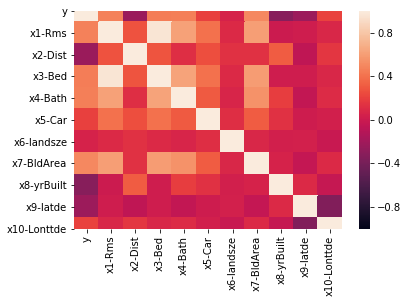

In [21]:
sns.heatmap(df.corr(),vmin=-1,vmax=1)

In [22]:
absCorr=abs(df.corr()['y'])#.sort_values,ascending=False
absCorr.sort_values


<bound method Series.sort_values of y              1.000000
x1-Rms         0.475074
x2-Dist        0.231212
x3-Bed         0.460880
x4-Bath        0.463501
x5-Car         0.209464
x6-landsze     0.058375
x7-BldArea     0.507284
x8-yrBuilt     0.313664
x9-latde       0.224255
x10-Lonttde    0.212174
Name: y, dtype: float64>

In [67]:
import scipy.stats   
import scipy.special 

In [23]:
X=df.iloc[:,1:]

In [24]:
X.head()

,x1-Rms,x2-Dist,x3-Bed,x4-Bath,x5-Car,x6-landsze,x7-BldArea,x8-yrBuilt,x9-latde,x10-Lonttde
2,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934
4,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944
6,4,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941
11,3,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993
14,2,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954


In [62]:
df.describe()

,y,x1-Rms,x2-Dist,x3-Bed,x4-Bath,x5-Car,x6-landsze,x7-BldArea,x8-yrBuilt,x9-latde,x10-Lonttde
count,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,1.092902e+06,3.098909,11.199887,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393
std,6.793819e+05,0.963786,6.813402,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919
min,1.310000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790
25%,6.410000e+05,2.000000,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000
50%,9.000000e+05,3.000000,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500
75%,1.345000e+06,4.000000,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560
max,9.000000e+06,12.000000,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350


In [25]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [32]:
#check for accuracy-use r2 for regression
classifier = LinearRegression()
scores= cross_val_score(classifier, X,y, cv=3, scoring='r2')
scores.mean()

0.5573258387303222

In [64]:
#find the RMSE
(np.sqrt(-cross_val_score(classifier, X, y, cv=3, scoring='neg_mean_squared_error')).mean())

450409.16099638824

In [66]:
scores.mean()

0.5573258387303249

In [67]:
print(scores)

[0.59803187 0.56550792 0.50843772]


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)


In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [51]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [52]:
X_test_scaled[:,0]

array([-0.07645953, -1.12758105, -0.07645953, ..., -0.07645953,
       -2.17870257,  0.97466198])

In [53]:
import statsmodels.api as sm
X2_train=sm.add_constant(X_train_scaled)
X2_test=sm.add_constant(X_test_scaled)
ols=sm.OLS(y_train,X_train)
lr=ols.fit()
lr.params

x1-Rms         1.461994e+05
x2-Dist       -2.815612e+04
x3-Bed        -2.372563e+04
x4-Bath        2.156485e+05
x5-Car         4.591213e+04
x6-landsze     2.252248e+01
x7-BldArea     2.602126e+03
x8-yrBuilt    -5.554401e+03
x9-latde      -1.108610e+06
x10-Lonttde   -2.124299e+05
dtype: float64

In [74]:
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              4905.
Date:                Sat, 22 Feb 2020   Prob (F-statistic):                        0.00
Time:                        09:34:14   Log-Likelihood:                         -89473.
No. Observations:                6220   AIC:                                  1.790e+05
Df Residuals:                    6210   BIC:                                  1.790e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [54]:
while lr.pvalues.max()>0.05:
    X2_train=np.delete(X2_train,lr.pvalues.values.argmax(),axis=1)
    X2_test=np.delete(X2_test,lr.pvalues.values.argmax(),axis=1)
    ols=sm.OLS(y_train,X2_train)
    lr=ols.fit()

In [77]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     866.1
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:35:43   Log-Likelihood:                -89852.
No. Observations:                6220   AIC:                         1.797e+05
Df Residuals:                    6211   BIC:                         1.798e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.091e+06   5765.953    189.188      0.0

In [56]:
y_pred_train=lr.predict(X2_train)
y_pred_test=lr.predict(X2_test)

In [57]:
(y_pred_train)[5]


874955.6167579192

In [58]:
y_pred_test[5]

356870.70487389097

In [59]:
r2_score(y_test,y_pred_test)

0.4514871430877949

In [60]:
np.sqrt(mean_squared_error(y_train,y_pred_train))


454414.1604139371

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

533538.796437373

In [90]:
r2=r2_score(y_test,y_pred_test)

In [92]:
adjustedR2=1-(1-r2)*((len(X2_test)-1)/(len(X2_test)-len(X2_test[0])))

In [93]:
print(r2,adjustedR2)

0.4514871430877948 0.4498362390790297


Text(0, 0.5, 'Predictions')

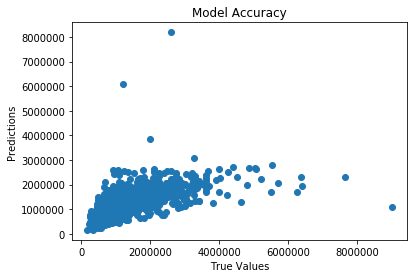

In [108]:
## check model fittness/accurancy in prediction 
plt.scatter(y_test, y_pred_test)
plt.title('Model Accuracy')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [102]:
#check for accuracy-kfold
classifier = LinearRegression()
scores= cross_val_score(classifier, X_test,y_test, cv=3, scoring='r2')

In [98]:
scores.mean()

0.5095879990676402

In [99]:
print(scores)

[0.43350461 0.58157862 0.51368077]
